# STAT2005 Computer Simulation - Workshop 2


We are going to examine two issues in this workshop. First we are going to explore the problems with the Linear Congruential Generator, specifically, the Multiplicative Congruential Generator, for purposes of generating pseudo random number. Second, we are going to construct functions that simulate different random variables. 

To begin we need to import a few libraries and setup our Jupyter notebook enviironment. 

## Import Libraries and Other Settings

Similar to [R], the power of [Python] hinges on the extensive collection of libraries (modules). In terms of scientific computing, three libraries are very useful, namely, [Numpy], [Scipy] and [Matplotlib]. In this workshop, we will be going through some of the features of these modules in order to complete our tasks. 

[Numpy] defines the basic structure of multi-dimensional arrays as well as functions and operators for these arrays. This includes objects such as vector and matrix as well as their operations. 

[Scipy] is an extensive modules for scientific computing. It is based on [Numpy] and uses [Numpy] objects extensively. It also contains routines for statistical analysis, including simulation of random variables as well as routines on optimisation. 

[Matplotlib] is a plotting module that contain sophisticated plotting routines. 

Please do visit the website of these modules by following their hyperlinks. They contains very useful information as well as detailed documentation of these modules. 

First we will import these modules:

[R]: http://cran.r-project.org
[Python]: http://www.python.org
[Numpy]: http://www.numpy.org
[Scipy]: http://www.scipy.org
[Matplotlib]: http://www.matplotlib.org

In [1]:
import numpy as np
import scipy.stats as sps
import scipy.special as spsp
import matplotlib.pyplot as plt

It is always a good practice to import them with a designated name rather than doing something like 

**from numpy import * **

or just 

**import numpy**. 

This is to avoid the confusion that may arise when different modules define different functions with the same name! 

Within [Jupyter notebook], we can execute some *[magic]* as well as other configurations to ensure our notebook perform the way we want. 

Two configurations are useful in this workshop. First we will execute the magic for [Matplotlib] so that all the plots show up on the notebook and second, we will configure the plot size to suit our need. 

[Jupyter notebook]: http://jupyter.org
[magic]: http://ipython.readthedocs.io/en/stable/interactive/magics.html
[Matplotlib]: http://www.matplotlib.org

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

## Linear Congruential Generator

Recall a LCG is defined by the following recurrence relation:

$$ y_{t+1} = Ay_t + B \; (\text{mod } m). $$

When $B=0$, it becomes the *multiplicative Congruential Generator*. 

Write a function similar to the one presented in the lecture to generate a sequence of $N$ pseudo random numbers by the LCG. $A,B$ and $m$ should be treated as inputs to this function. 

**Hint** Recall $A\%B$ defines the modulo operator in [Python](http://www.python.org). 


In [10]:
def LCG(N, A, B, m, y0):
    """
    An implementation of the linear congruential generator. 
    Inputs:
        N: int. The number of pseudo number generator. 
        A: int. The multipler.
        B: int. The increment.
        m: int. Modulus. 
        y0: int in [0, m-1]. The initial value. 
    Output:
        y: (N,) numpy array. 
    """
    
    if (y0 <0)|(y0>=m):
        print("The initial value cannot be negative or greater than the modulus.") 
    elif (A>=m)|(A<0):
        print("The multiplier cannot be negative or greater than the modulus.")
    elif (B>=m)|(B<0):
        print("The increment cannot be negative or greater than the modulus.")
    else:
        y = np.zeros(N+1)
        y[0] = y0
        for t in np.arange(N):
            y[t+1] = (A*y[t]+B)%m
    return y[1:N+1]/m

## Two Dimensional Random Draws with LCG

Consider the problem of generating a set of random points on a rectangle, that is, we want to generate a set of $N$ pairs of random numbers $(x_i, y_i)$ where $x_i, y_i \in [0,1]$ for $i=1,\ldots, N$. 

One way to do this is to utilise our LCG function and generate $N+1$ pseudo random numbers, $\{u_1, \ldots, u_{N+1}\}$, then our $N$ random points can be constructed as $(u_1,u_2), (u_2,u_3), (u_3, u_4), \ldots, (u_N, u_{N+1})$. 

Construct a set of 50 random points by following this algoirthm. Use $A=127$, $B=0$, $m=511$, $y_0=1$. 

**Hint:** You may wish to construct a function to return a two dimensional random generator using LCG, as we will be using this algorithm repeatedly. 

Use **plt.scatter** to draw a scatter plot of the random points from this algorithm

In [22]:
def LCG_2dim(n,A,B,m,y0):
    """
    Generate two dimensional random points using LCG. 
    Inputs:
        n: Positive int. Number of draws. 
        A: Positive int. Multiplier in the LCG. 
        B: Positive int. Shift in the LCG
        m: Positive int. Modulo 
        y0: int in [0,...m-1] initial values. 
    Output:
        y: (N,2) numpy array. 
    """
    N = n+1
    U = LCG(N,A,B,m,y0)
    y = np.c_[U[0:N-1], U[1:N]]
    return y

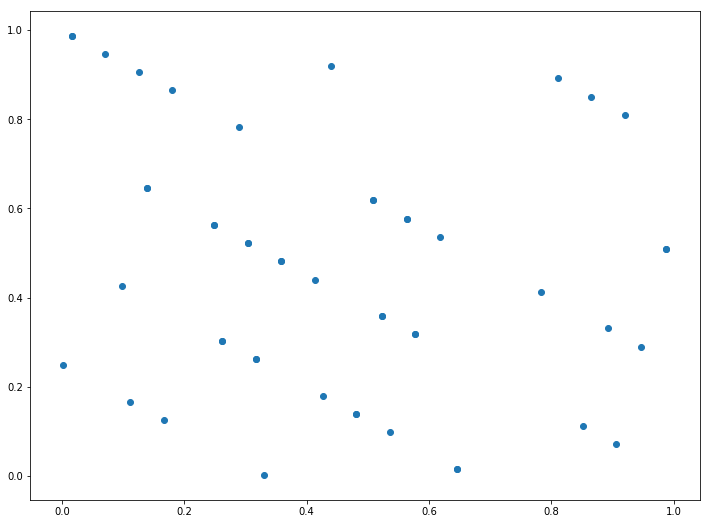

In [23]:
N = 50
A = 127
B = 0
m = 511
y0 = 1
y = LCG_2dim(N,A,B,m,y0).transpose()
plt.scatter(y[0], y[1])

Now set $N=2000$ with the same set of $A,B$ and $m$. Repeat the draw and construct a scatter plot again. What do you see and what do you think is happening? 

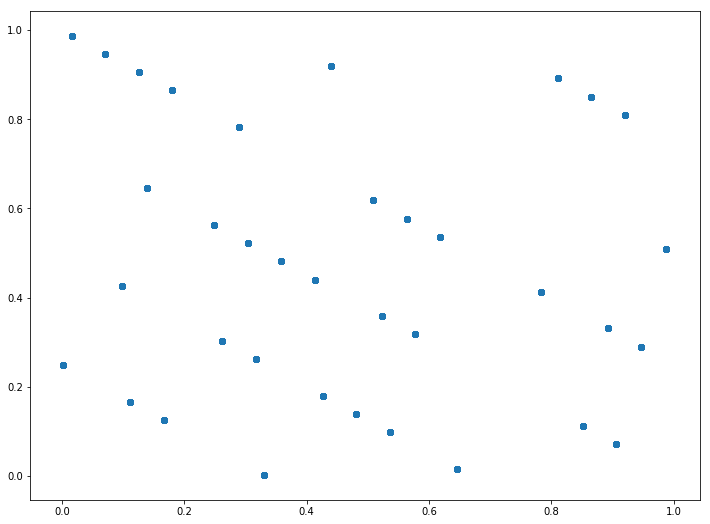

In [24]:
N = 2000
A = 127
B = 0
m = 511
y0 = 1
y = LCG_2dim(N,A,B,m,y0).transpose()
plt.scatter(y[0], y[1])

Now change $m=2^{16}$ and repeat the above. What do you see now? 

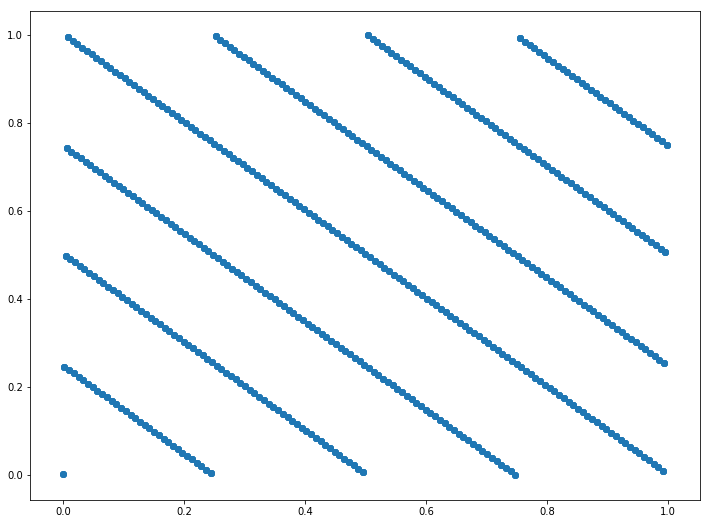

In [25]:
N = 2000
A = 127
B = 0
m = 2**16
y0 = 1
y = LCG_2dim(N,A,B,m,y0).transpose()
plt.scatter(y[0], y[1])

Let's repeat one more time but use $m=2^{11}-1$. 

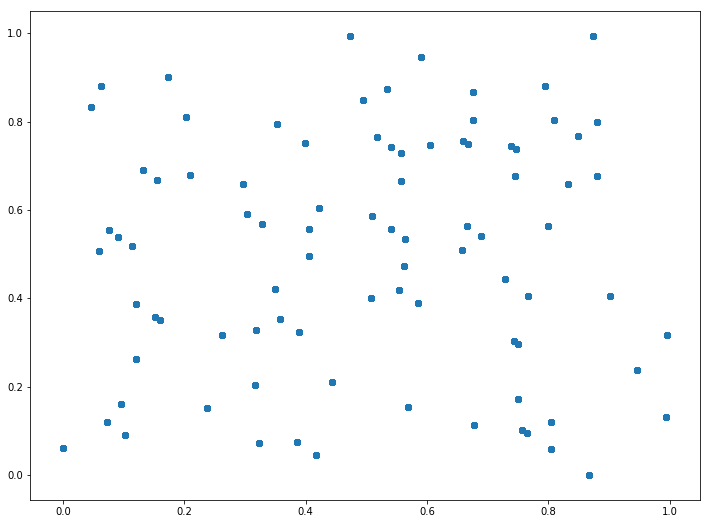

In [26]:
N = 2000
A = 127
B = 0
m = 2**11-1
y0 = 1
y = LCG_2dim(N,A,B,m,y0).transpose()
plt.scatter(y[0], y[1])

Does this setting looks better? What happen when you increase $N$ to 20000?

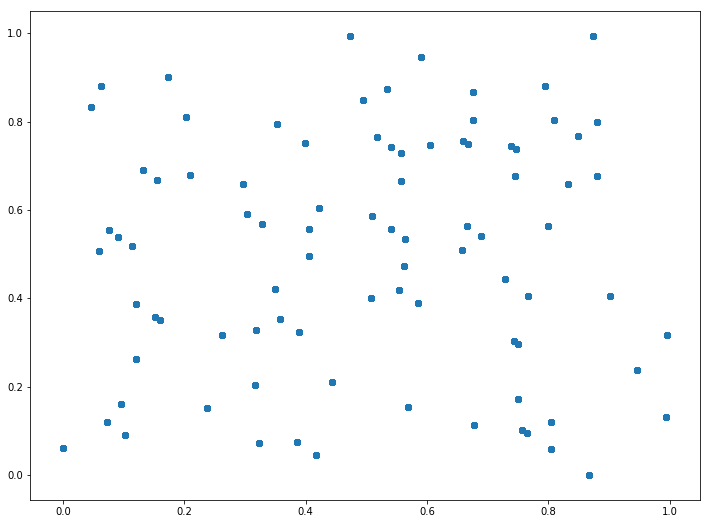

In [27]:
N = 20000
A = 127
B = 0
m = 2**11-1
y0 = 1
y = LCG_2dim(N,A,B,m,y0).transpose()
plt.scatter(y[0], y[1])

**Comment** You don't see 20000 points in the plot above. This means the period of this setting is very low. 

We can compare the above with the random number generator from Python and see how different they are. 

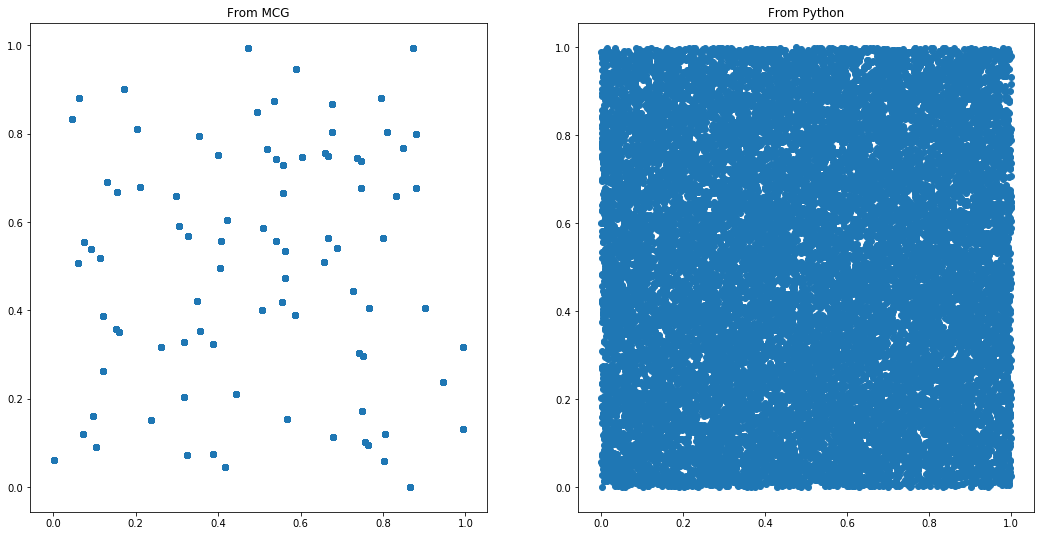

In [28]:
tempy = sps.uniform.rvs(size=N)
y1 = np.c_[tempy[0:N-1], tempy[1:N]].transpose()
plt.rcParams['figure.figsize'] = [18,9]
plt.subplot(1,2,1)
plt.scatter(y[0], y[1])
plt.title('From MCG')
plt.subplot(1,2,2)
plt.scatter(y1[0], y1[1])
plt.title('From Python')
plt.rcParams['figure.figsize'] = [12,9]

What can you say about LCG given the two essential criteria of a good pseudo random generator? Recall the two essential criteria are:

1. Long period. 
2. Ability to reach as many numbers within the interval as possible. 

## Discrete Random Numbers (Bernoulli Trial)

Construct a function that will return a sequence of N indpendent (Bernoulli) trails with given success probability, $p$. 


In [29]:
def RV_Bernoulli(N,p):
    """
    Simulate a sequence of N independent Bernoulli trails with success probability p. 
    Inputs:
        N: Positive int. The number of trails to simulate. 
        p: [0,1]. Probability of success
    Output:
        y: (N,) numpy array of 0 and 1. 
    
    """
    U = sps.uniform.rvs(0,1,size=N)
    y = np.zeros(N)
    y[U<p] = 1
    return y

(array([1.7, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 8.3]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

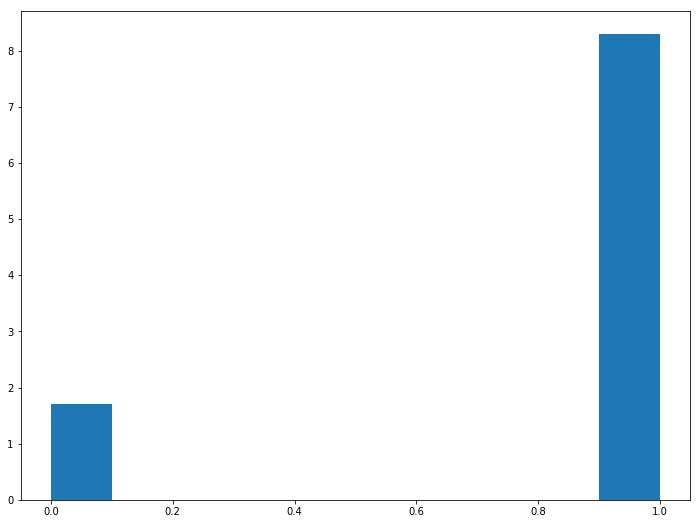

In [37]:
N = 100
p = 0.8
B = RV_Bernoulli(N,p)
plt.hist(B, normed=1)

## Discrete Random Numbers (Poisson)

Recall the PMF for a Poisson random varibale is $X\sim Poi(\lambda)$
    $$ p(x; \lambda) = \frac{\exp (-\lambda) \lambda^x}{x!}, \qquad x=0,1,2,\ldots $$
    
Construct a function that will take $\lambda$ and the number of random draws as inputs and return a $(N,)$ numpy array containing random number following the Poisson distribution. 

**Hint** Use scipy.special.factorial() for calculating $x!$ and use numpy.power() to calculate $\lambda^x$. 

In [38]:
def PMF_poisson(x,l):
    """
    Return the probabililty of x for random variable following a poisson distribution with the parameter l. 
    Inputs:
        x: positive int, including 0. 
        l: positive int. The parameter in the poisson distribution. 
    Output:
        p: probability of x. 
    """
    
    return np.exp(-l)*np.power(l,x)/spsp.factorial(x)

In [39]:
def CDF_poisson(x,l):
    """
    Calculate the cumulative probability for a poisson distribution given l. 
    Inputs:
        x: positive int, including 0. 
        l: positive int. The parameter in the poisson distribution. 
    Output:
        y: The Poisson CDF from 0 to x. 
    
    """
    sumset = [PMF_poisson(i,l) for i in np.arange(0,x+1,1)]
    return sum(sumset)

In [51]:
def __choose_x__(u,l):
    """
    Decide the value of x to be returned given the uniform draw u and the Poisson parameter l. To be used with RV_poisson()
    Inputs:
        u: Random draw from a U(0,1) distribution.
        l: The parameter of the Poisson Distribution. 
    Output:
        x: int. Random draw from a poisson distribution. 
    """
    to_return = False
    x = 0
    while to_return is False:
        cdf = CDF_poisson(x,l)
        if u > cdf:
            x = x+1
        else:
            to_return = True
    return x

def RV_poisson(N,l):
    """
    Simulate a set of N random draws based on the Poisson distribution with parameter l using the Inversion method. 
    Inputs:
        N: Positive int. The numebr of draws. 
        l: Positive int. The parameter in the Poisson distribuion. 
    Output:
        y: (N,) numpy array containing N random draws. 
    
    """
    U = sps.uniform.rvs(0,1,size=N)
    y = np.zeros(N)
    for i,u in enumerate(U):
        y[i] = __choose_x__(u,l)
    return y

In [54]:
N = 500
l = 1
test = RV_poisson(N,l)

(array([0.748, 0.   , 0.724, 0.   , 0.348, 0.   , 0.132, 0.   , 0.044,
        0.004]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

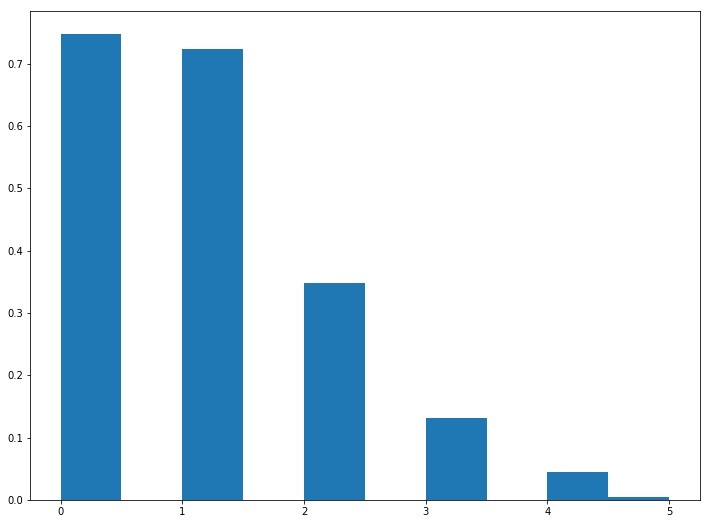

In [55]:
plt.hist(test, normed=1)

The code above utilises the algorithm as is but it is not the most efficient. We can improve efficiency by considering the following.  

In [56]:
def __choose_x_eff__(u,l):
    """
    Decide the value of x to be returned given the uniform draw u and the Poisson parameter l. To be used with RV_poisson()
    Inputs:
        u: Random draw from a U(0,1) distribution.
        l: The parameter of the Poisson Distribution. 
    Output:
        x: int. Random draw from a poisson distribution. 
    """
    to_return = False
    x = 0
    cdf = 0 
    while to_return is False:
        cdf = cdf + PMF_poisson(x,l)
        if u > cdf:
            x = x+1
        else:
            to_return = True
    return x

def RV_poisson_eff(N,l):
    """
    Simulate a set of N random draws based on the Poisson distribution with parameter l using the Inversion method. 
    Inputs:
        N: Positive int. The numebr of draws. 
        l: Positive int. The parameter in the Poisson distribuion. 
    Output:
        y: (N,) numpy array containing N random draws. 
    
    """
    U = sps.uniform.rvs(0,1,size=N)
    y = np.zeros(N)
    for i,u in enumerate(U):
        y[i] = __choose_x_eff__(u,l)
    return y

(array([0.74 , 0.   , 0.72 , 0.   , 0.336, 0.   , 0.16 , 0.   , 0.04 ,
        0.004]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

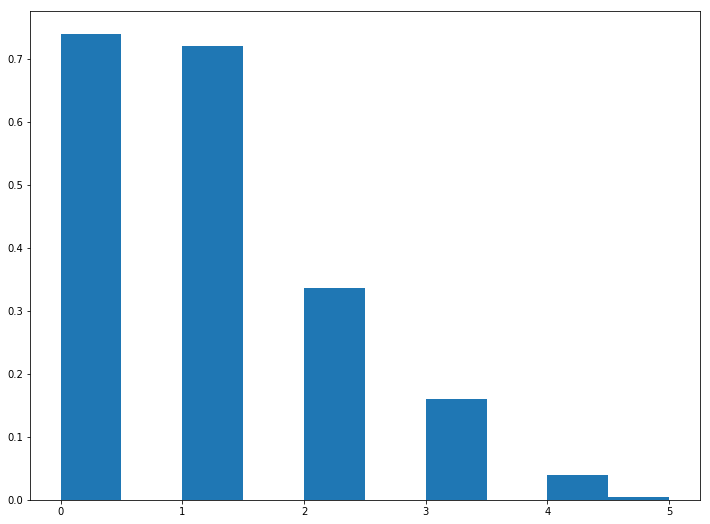

In [59]:
N = 500
l = 1
test_eff = RV_poisson_eff(N,l)
plt.hist(test_eff, normed=1)